/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/99klhe01/Library/Python/3.9/lib/python/site-packages/gym/utils/passive_env_checker.py:31: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (5, 5)
  logger.warn(
/Users/99klhe01/Library/Python/3.9/lib/python/site-packages/gym/utils/passive_env_checker.py:289: UserWarning: WARN: No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps.
  logger.warn(


{'action': {'type': 'DiscreteMetaAction'},
 'centering_position': [0.3, 0.5],
 'collision_reward': -1,
 'controlled_vehicles': 1,
 'duration': 40,
 'ego_spacing': 2,
 'high_speed_reward': 0.4,
 'id': 'highway-v0',
 'import_module': 'highway_env',
 'initial_lane_id': 0,
 'lane_change_reward': 0,
 'lanes_count': 6,
 'manual_control': False,
 'normalize_reward': True,
 'observation': {'type': 'Kinematics'},
 'offroad_terminal': False,
 'offscreen_rendering': True,
 'other_vehicles_type': 'highway_env.vehicle.behavior.IDMVehicle',
 'policy_frequency': 1,
 'real_time_rendering': False,
 'render_agent': True,
 'reward_speed_range': [0, 100],
 'right_lane_reward': 0.1,
 'scaling': 5.5,
 'screen_height': 150,
 'screen_width': 600,
 'show_trajectories': False,
 'simulation_frequency': 15,
 'vehicles_count': 90,
 'vehicles_density': 1}
'rl-agents/scripts/configs/HighwayEnv/agents/DQNAgent/dqn.json'


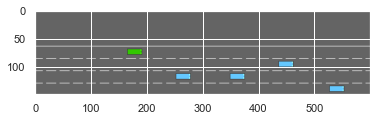

Preferred device cuda:best unavailable, switching to default cpu


In [1]:
import gym
import rl_agents
import pprint
from rl_agents.agents.common.factory import load_agent, load_environment
from rl_agents.trainer.evaluation import Evaluation
from matplotlib import pyplot as plt

env_config = 'rl-agents/scripts/configs/HighwayEnv/env.json'
agent_config = 'rl-agents/scripts/configs/HighwayEnv/agents/DQNAgent/dqn.json'

env = load_environment(env_config)
env.configure({"offscreen_rendering": True})
env.config["lane_change_reward"] = 0
env.config["vehicles_count"] = 90
env.config['reward_speed_range'] = [0, 100]
env.config["lanes_count"] = 6
env.config["initial_lane_id"] = 0
pprint.pprint(env.config)
pprint.pprint(agent_config)
env.reset()

plt.imshow(env.render(mode="rgb_array"))
plt.show()

agent = load_agent(agent_config, env)
evaluation = Evaluation(env, agent, num_episodes=700, display_env=False, display_agent=False)

In [2]:
evaluation.train()

/Users/99klhe01/Library/Python/3.9/lib/python/site-packages/rl_agents/agents/deep_q_network/pytorch.py:80: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:233.)
  return self.value_net(torch.tensor(states, dtype=torch.float).to(self.device)).data.cpu().numpy()
[INFO] Episode 0 score: 4.4 
[INFO] Saved DQNAgent model to out/HighwayEnv/DQNAgent/run_20221222-160420_46139/checkpoint-0.tar 
[INFO] Episode 1 score: 9.0 
[INFO] Saved DQNAgent model to out/HighwayEnv/DQNAgent/run_20221222-160420_46139/checkpoint-1.tar 
[INFO] Episode 2 score: 3.8 
[INFO] Episode 3 score: 15.3 
[INFO] Episode 4 score: 26.1 
[INFO] Episode 5 score: 4.6 
[INFO] Episode 6 score: 22.6 
[INFO] Episode 7 score: 4.6 
[INFO] Episode 8 score: 12.4 
[INFO] Saved DQNAgent model to o

KeyboardInterrupt: 

In [3]:
env.configure({"offscreen_rendering": True})
env.render(mode="rgb_array")
evaluation = Evaluation(env, agent, num_episodes=3, recover=True)
evaluation.test()

[INFO] Loaded DQNAgent model from out/HighwayEnv/DQNAgent/saved_models/latest.tar 
INFO: Starting new video recorder writing to /Users/99klhe01/Documents/highway-env/scripts/out/HighwayEnv/DQNAgent/run_20221222-214002_46139/rl-video-episode-0.mp4


Moviepy - Building video /Users/99klhe01/Documents/highway-env/scripts/out/HighwayEnv/DQNAgent/run_20221222-214002_46139/rl-video-episode-0.mp4.
Moviepy - Writing video /Users/99klhe01/Documents/highway-env/scripts/out/HighwayEnv/DQNAgent/run_20221222-214002_46139/rl-video-episode-0.mp4



[INFO] Episode 0 score: 29.1                                   
INFO: Starting new video recorder writing to /Users/99klhe01/Documents/highway-env/scripts/out/HighwayEnv/DQNAgent/run_20221222-214002_46139/rl-video-episode-1.mp4


Moviepy - Done !
Moviepy - video ready /Users/99klhe01/Documents/highway-env/scripts/out/HighwayEnv/DQNAgent/run_20221222-214002_46139/rl-video-episode-0.mp4
Moviepy - Building video /Users/99klhe01/Documents/highway-env/scripts/out/HighwayEnv/DQNAgent/run_20221222-214002_46139/rl-video-episode-1.mp4.
Moviepy - Writing video /Users/99klhe01/Documents/highway-env/scripts/out/HighwayEnv/DQNAgent/run_20221222-214002_46139/rl-video-episode-1.mp4



[INFO] Episode 1 score: 28.9                                   


Moviepy - Done !
Moviepy - video ready /Users/99klhe01/Documents/highway-env/scripts/out/HighwayEnv/DQNAgent/run_20221222-214002_46139/rl-video-episode-1.mp4


[INFO] Episode 2 score: 29.0 


In [ ]:
from utils import show_vi